Do a modular approach for writing a custom kNN algorithm (without library function). 
1. feature Scaling
2. Calculate distance (check with every other distance)
3. Finding k-Nearest neighbor
4. Perform majority voting
5. Evaluate model
6. Perform evaluation metric and check the elbow plot (line plot) for every value of k and every value of distance metric
7. Show Voronoi diagram (Purely optional)

In [1]:
import numpy as np
from collections import Counter

# 1. Feature Scaling
def feature_scaling(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# 2. Calculate Distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# 3. Finding k-Nearest Neighbors
def get_neighbors(X_train, X_test_instance, k):
    distances = []
    for i in range(X_train.shape[0]):
        dist = euclidean_distance(X_train[i], X_test_instance)
        distances.append((i, dist))
    sorted_distances = sorted(distances, key=lambda x: x[1])
    neighbors = sorted_distances[:k]
    return neighbors

# 4. Perform Majority Voting
def majority_voting(neighbors, y_train):
    classes = [y_train[i[0]] for i in neighbors]
    most_common = Counter(classes).most_common(1)
    return most_common[0][0]

# 5. Evaluate Model
def predict(X_train, y_train, X_test, k):
    y_pred = []
    for i in range(X_test.shape[0]):
        neighbors = get_neighbors(X_train, X_test[i], k)
        majority_vote = majority_voting(neighbors, y_train)
        y_pred.append(majority_vote)
    return y_pred

# 6. Perform Evaluation Metric
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


For k val:  1 , acc =  0.9666666666666667
For k val:  2 , acc =  0.9666666666666667
For k val:  3 , acc =  1.0
For k val:  4 , acc =  1.0
For k val:  5 , acc =  1.0
For k val:  6 , acc =  1.0
For k val:  7 , acc =  1.0
For k val:  8 , acc =  1.0
For k val:  9 , acc =  1.0
For k val:  10 , acc =  1.0
For k val:  11 , acc =  1.0
For k val:  12 , acc =  1.0
For k val:  13 , acc =  1.0
For k val:  14 , acc =  1.0
For k val:  15 , acc =  1.0
For k val:  16 , acc =  1.0
For k val:  17 , acc =  1.0
For k val:  18 , acc =  1.0
For k val:  19 , acc =  0.9666666666666667
For k val:  20 , acc =  1.0
For k val:  21 , acc =  0.9666666666666667
For k val:  22 , acc =  1.0
For k val:  23 , acc =  0.9666666666666667
For k val:  24 , acc =  0.9666666666666667
For k val:  25 , acc =  0.9666666666666667
For k val:  26 , acc =  0.9666666666666667
For k val:  27 , acc =  0.9666666666666667
For k val:  28 , acc =  0.9666666666666667
For k val:  29 , acc =  0.9666666666666667
The optimal number of neighbors 

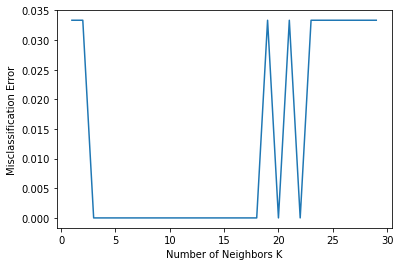

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature Scaling
X_train = feature_scaling(X_train)
X_test = feature_scaling(X_test)

# List of K for KNN
neighbors = list(range(1,30))

# Empty list that will hold accuracy scores
ac_scores = []

# Perform kNN over every K
for k in neighbors:
    y_pred = predict(X_train, y_train, X_test, k)
    scores = accuracy(y_test, y_pred)
    ac_scores.append(scores)
    print("For k val: ",k, ", acc = ",scores)

# Changing to misclassification error (This is optional. Depends on what you want to see in the plot)
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# Plot misclassification error vs k (or accuracy vs k if you didn't calculate MSE)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
